In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
df1 = pd.read_csv("song_data.csv")
df2 = pd.read_csv("triplets_file.csv")

In [24]:
df1.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [25]:
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [27]:
df1.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [29]:
df2.describe()

,listen_count
count,2.000000e+06
mean,3.045485e+00
std,6.579720e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,2.213000e+03


In [30]:
df1["year"] = df1["year"].astype('Int64')
df1.rename(columns={"release": "album", "artist_name": "artist"}, inplace=True)
df1.head()

,song_id,title,album,artist,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [31]:
df2["listen_count"] = df2["listen_count"].astype('Int64')
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [32]:
df = pd.merge(df2, df1.drop_duplicates(["song_id"]), on='song_id', how='left')
df['song'] = df['artist'] + ' - ' + df['title']
df = df.drop(['title'], axis=1)
df = df.head(50000)
df.head()

,user_id,song_id,listen_count,album,artist,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,Thicker Than Water,Jack Johnson,0,Jack Johnson - The Cove
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Flamenco Para Niños,Paco De Lucia,1976,Paco De Lucia - Entre Dos Aguas
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Graduation,Kanye West,2007,Kanye West - Stronger
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,In Between Dreams,Jack Johnson,2005,Jack Johnson - Constellations
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,There Is Nothing Left To Lose,Foo Fighters,1999,Foo Fighters - Learn To Fly


In [33]:
print("Number of entries in each column:\n")
df.count()

Number of entries in each column:



user_id         50000
song_id         50000
listen_count    50000
album           50000
artist          50000
year            50000
song            50000
dtype: int64

In [34]:
print("Number of unique users: ", df.user_id.nunique(dropna = True))
print("Number of artists: ", df.artist.nunique(dropna=True))
print("Number of songs: ", df.song_id.nunique(dropna=True))

Number of unique users:  1879
Number of artists:  3215
Number of songs:  9370


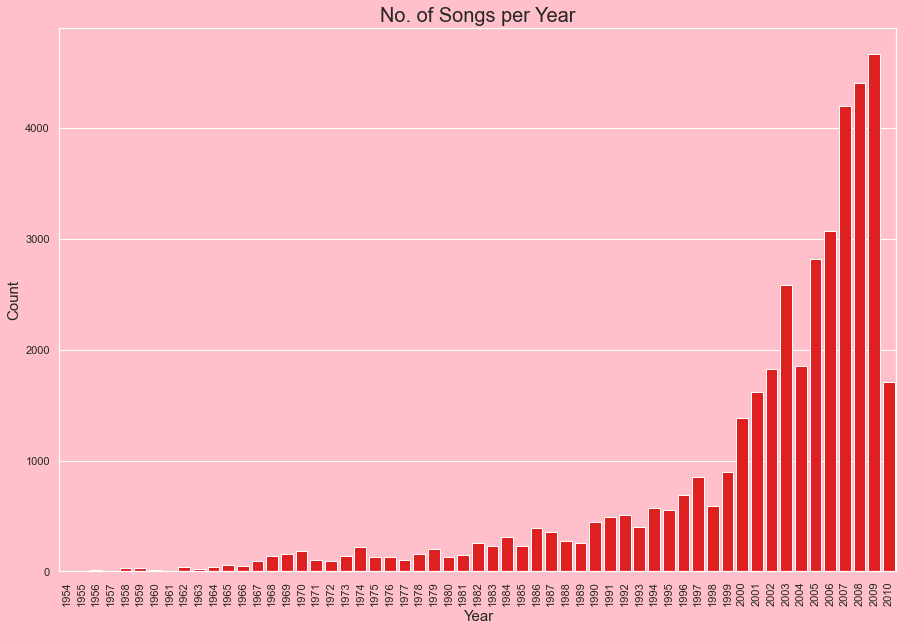

In [35]:
plt.figure(figsize=(15, 10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.countplot(x='year', data=df[-(df['year']==0)], color="red")
plt.xticks(rotation=90)
plt.title("No. of Songs per Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

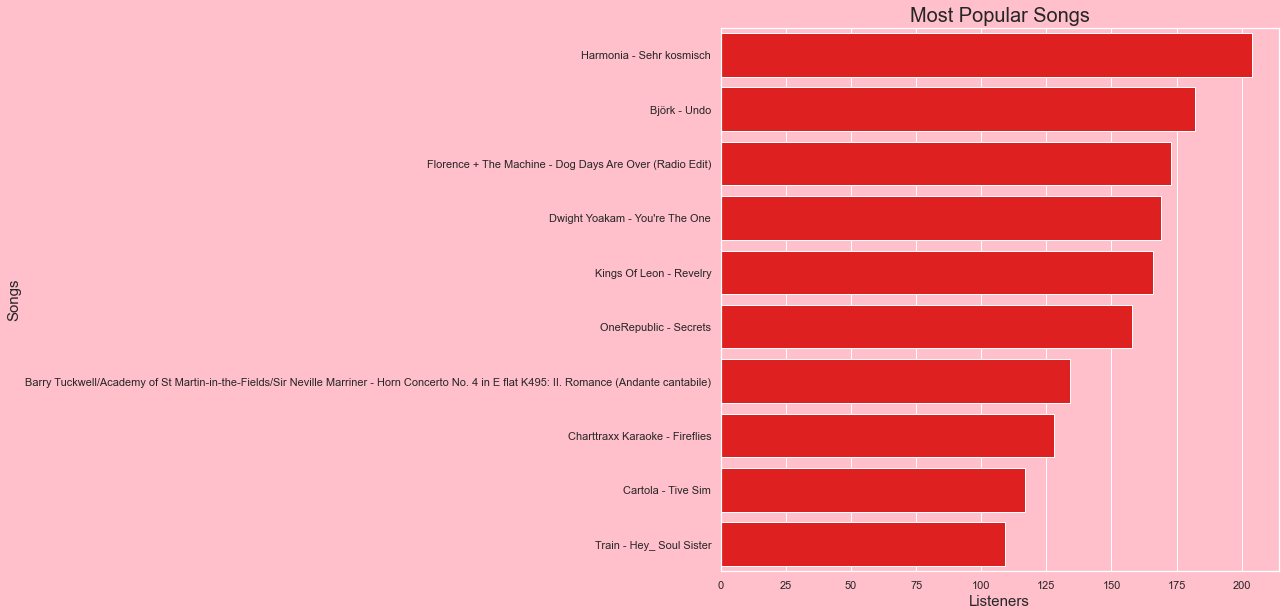

In [36]:
plt.figure(figsize=(10,10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.barplot(x = (df['song'].value_counts()[:10].values), y = (df['song'].value_counts()[:10].index), color="red")
plt.title('Most Popular Songs', fontsize=20)
plt.xlabel('Listeners', fontsize=15)
plt.ylabel('Songs', fontsize=15)
plt.show()

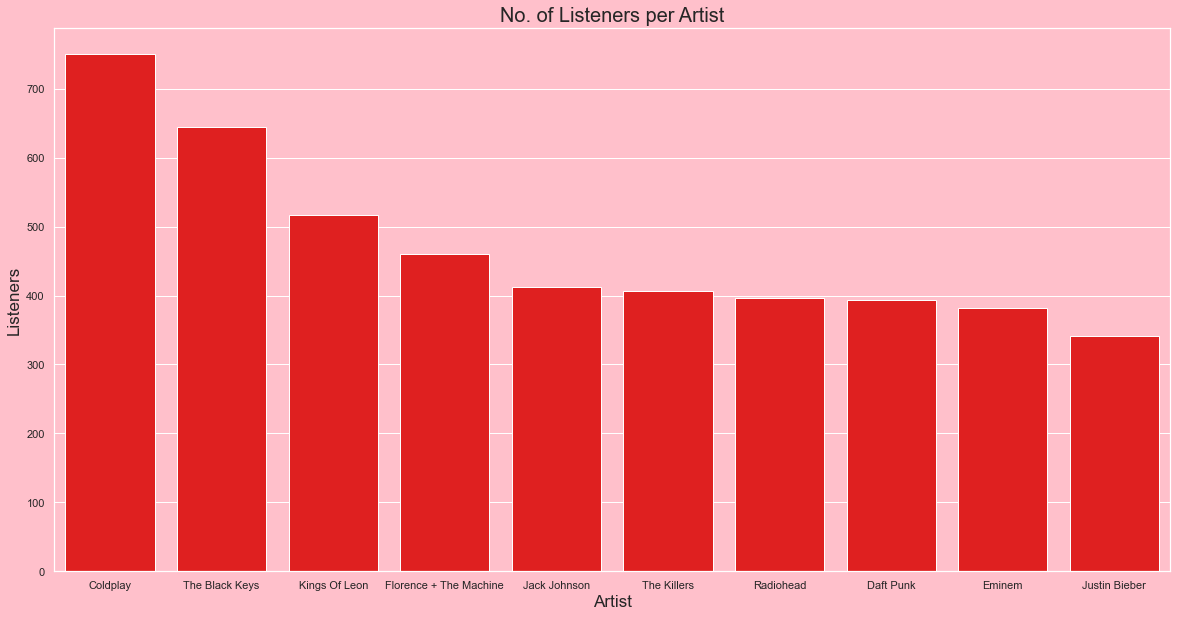

In [37]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
sns.barplot(x = (df['artist'].value_counts()[:10].index), y = (df['artist'].value_counts()[:10].values), color="red")
plt.title('No. of Listeners per Artist', fontsize=20)
plt.xlabel('Artist', fontsize=17)
plt.ylabel('Listeners', fontsize=17)
plt.show()

In [38]:
class Engine():
    def __init__(self, data, user_id, song):
        self.data = data
        self.user_id = user_id
        self.song = song
        self.glcm = None
        
    def get_song_history(self, user):
        user_data = self.data[self.data[self.user_id] == user]
        return list(user_data[self.song].unique())
        
    def get_users(self, item):
        item_data = self.data[self.data[self.song] == item]
        return set(item_data[self.user_id].unique())
        
    def get_all_songs(self):
        return list(self.data[self.song].unique())
        
    def get_glcm(self, user_songs, all_songs):
        users = []        
        for i in range(0, len(user_songs)):
            users.append(self.get_users(user_songs[i]))   
        glcm = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        for i in range(0,len(all_songs)):
            songs_i_data = self.data[self.data[self.song] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):           
                users_j = users[j]
                users_intersection = users_i.intersection(users_j)
               
                users_union = users_i.union(users_j)
                glcm[j,i] = float(len(users_intersection))/float(len(users_union))

        return glcm

    def generate_recommendations(self, user, glcm, all_songs, user_songs):
        sim_scores = glcm.sum(axis=0)/float(glcm.shape[0])
        sim_scores = np.array(sim_scores)[0].tolist()
 
        sort_index = sorted(((e,i) for i,e in enumerate(list(sim_scores))), reverse=True)
        columns = ['UserID', 'Song', 'Score', 'Rank']
        df = pd.DataFrame(columns=columns)
         
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        print("Music Recommendations: \n")
        return df.drop(['UserID'], axis=1)

    def get_recommendations(self, user):
        user_songs = self.get_song_history(user)    
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations(user, glcm, all_songs, user_songs)

    def get_similar_songs(self, item_list):
        user_songs = item_list
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations("", glcm, all_songs, user_songs)

In [39]:
eng = Engine(df, 'user_id', 'song')
song_history = eng.get_song_history(df['user_id'][1001])

In [40]:

print("User Song History: \n")
for song in song_history:
  print(song)

User Song History: 

Muse - Uprising
Weezer - No One Else
Yeah Yeah Yeahs - Runaway
The Killers - Losing Touch
The Rural Alberta Advantage - Don't Haunt This Place
Florence + The Machine - Dog Days Are Over (Radio Edit)
Bright Eyes - At The Bottom Of Everything
Jason Mraz & Colbie Caillat - Lucky (Album Version)
Weezer - Island In The Sun
Tiny Vipers - They Might Follow You
Fleet Foxes - Innocent Son
Linkin Park - Bleed It Out [Live At Milton Keynes]
Frightened Rabbit - Yawns
Weezer - El Scorcho
Coldplay - Clocks
Adam Lambert - Whataya Want From Me
Justin Bieber - Somebody To Love
Katy Perry - Waking Up In Vegas (Calvin Harris Remix Edit)
Emmy The Great - Mia
Weezer - My Name Is Jonas
Darwin Deez - Radar Detector
Rihanna - Rehab
Camera Obscura - Teenager
Lily Allen - Not Big
Timbaland / Justin Timberlake / Nelly Furtado - Give It To Me
The New Pornographers - Falling Through Your Clothes
Ray LaMontagne - Trouble (Album Version)
Yeah Yeah Yeahs - Soft Shock
Bright Eyes - Old Soul Song
D

In [41]:
eng.get_recommendations(df['user_id'][1001])

Music Recommendations: 



,Song,Score,Rank
0,Usher featuring will.i.am - OMG,0.045576,1
1,Kid Cudi / MGMT / Ratatat - Pursuit Of Happine...,0.045071,2
2,Beyoncé - Halo,0.043027,3
3,Paramore - The Only Exception (Album Version),0.042851,4
4,Train - Hey_ Soul Sister,0.042728,5
5,OneRepublic - Secrets,0.042554,6
6,Florence + The Machine - Cosmic Love,0.041469,7
7,The Script - Breakeven,0.038114,8
8,La Roux - Bulletproof,0.037494,9
9,Linkin Park - In The End (Album Version),0.037255,10


In [42]:
eng.get_similar_songs(['La Roux - Bulletproof'])

Music Recommendations: 



,Song,Score,Rank
0,Usher featuring will.i.am - OMG,0.191781,1
1,Lady GaGa / Colby O'Donis - Just Dance,0.178571,2
2,Lady GaGa - Alejandro,0.177778,3
3,Charttraxx Karaoke - Fireflies,0.171271,4
4,Train - Marry Me,0.165644,5
5,Kid Cudi / MGMT / Ratatat - Pursuit Of Happine...,0.165468,6
6,Paramore - The Only Exception (Album Version),0.165354,7
7,Florence + The Machine - Dog Days Are Over (Ra...,0.162896,8
8,Kings Of Leon - Use Somebody,0.162338,9
9,DJ Dizzy - Sexy Bitch,0.162162,10
